<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/edge_detection/aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectia marginilor folosind Ant Colony Optimization

In [1]:
import numpy
import random
import math
import matplotlib.image as m_img
from matplotlib import pyplot as plt
import matplotlib

Se citeste imaginea tinta

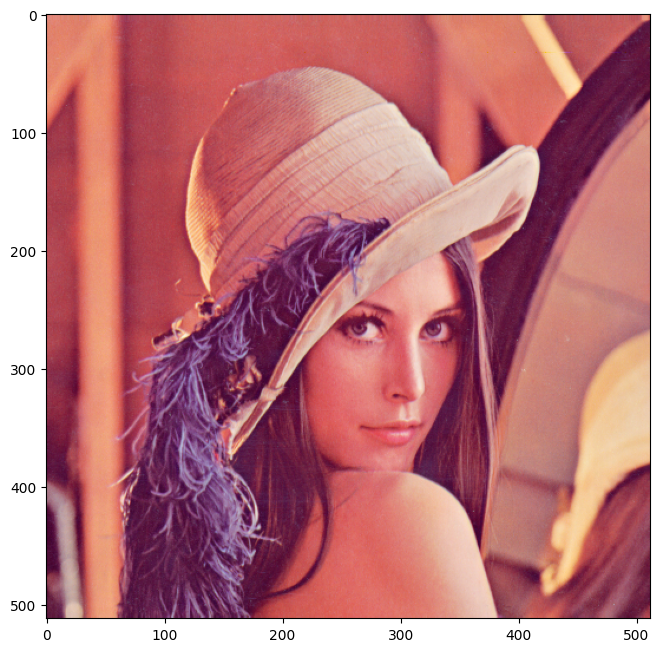

In [2]:
img = m_img.imread("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/edge_detection/res/lena.png")
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(img)

Se descriu unele functii ajutatoare

In [3]:
def normalization(img):
    res = numpy.copy(img)
    for i in range(1, len(img[1, :]) - 1):
        for j in range(1, len(img[:, 1]) - 1):
            res[i, j] = abs(img[i-1, j-1] - img[i+1, j+1]) + abs(img[i-1, j] - img[i+1, j]) + abs(img[i-1, j+1] - img[i+1, j-1]) + abs(img[i, j-1] - img[i, j+1])
    return res

def func1(x, l):
    return x * l

def func2(x, l):
    return l * x**2
    
def func3(x, l):
    return math.sin((numpy.pi * x) / (2.0 * l))
    
def func4(x, l):
    return math.sin(numpy.pi * x * math.sin((numpy.pi * x) / (l)) / l)

Hiperparametrii algoritmului

In [4]:
br_iter = 2
br_ant = 5000
br_step = 50
alpha = 1.0
beta = 2.0
phi = 0.05
rho = 0.1
treshold = 0.6
tau = 0.1
lambd = 10
f = func1

Se initializeaza parametrii metodei

In [5]:
pheromones = numpy.copy(img)

for i in range(len(img[:, 1])):
    for j in range(len(img[1, :])):
        pheromones[i,j] = tau

delta_tau = []

for i in range(len(img[:, 1])):
    vals = []
    for j in range(len(img[1, :])):
        vals.append(0.0)
    delta_tau.append(vals)
    
normal_img = normalization(img)
informations = []
for i in range(len(img[:, 1])):
    vals = []
    for j in range(len(img[:,1])):
        if normal_img[i, j][0] * numpy.sqrt(len(normal_img[i, j])) > treshold:
            vals.append(f(normal_img[i, j][0], lambd))
        else:
            vals.append(0.0)
    informations.append(vals)

routes = []
for i in range(br_ant):
    routes.append([[random.randint(1, len(img[1, :]) - 1), random.randint(1, len(img[:, 1]) - 1)]])

Functia pas, unde se actualizeaza fiecare furnica artificiala separat.

In [6]:
def step(k, l):
    i0 = routes[k][l][0]
    j0 = routes[k][l][1]
    xMinLim = i0 - 1
    xMaxLim = i0 + 1
    yMinLim = j0 - 1
    yMaxLim = j0 + 1
    
    if i0 == 0: 
        xMinLim == 0
    if j0 == 0:
        yMinLim == 0
    if i0 >= len(img[1, :]) - 1:
        xMaxLim = len(img[1, :]) - 1
    if j0 >= len(img[:, 1]) - 1:
        yMaxLim = len(img[:, 1]) - 1
    
    neighbourhood=[]
    for i in range(xMinLim, xMaxLim+1): 
        for j in range(yMinLim, yMaxLim+1):
            if (i != i0 or j != j0):
                false = 0
                for positions in routes[k]:
                    if positions[0] == i and positions[1] == j:
                        false = 1
                        break
                if false == 0:
                    neighbourhood.append([i, j])

    u = random.random()
    p = 0
    
    if not neighbourhood: 
        m = i0
        n = j0
        routes[k].append([m, n])
    else:              
        j = 0
        brojac = 0           
        while u > p: 
            p = p + float(pow(pheromones[neighbourhood[j][0], neighbourhood[j][1]][0], alpha)) * float(pow(informations[neighbourhood[j][0]][neighbourhood[j][1]], beta))
            j += 1
            brojac += 1
            if j == len(neighbourhood):
                j = 0    
            if brojac > 15: 
                j = random.randint(0, len(neighbourhood))
                break
            
        routes[k].append(neighbourhood[j - 1])
        m=neighbourhood[j - 1][0]
        n=neighbourhood[j - 1][1]
            
    pheromones[m, n] = (1 - phi) * pheromones[m, n] + phi * tau
    delta_tau[m][n] += informations[m][n] / float(l + 1) 

In [7]:
def finish():
    for i in range(len(img[1, :])):
        for j in range(len(img[:, 1])):
            pheromones[i, j] = (1 - rho) * pheromones[i, j] + rho * delta_tau[i][j]

Se ruleaza metoda in functie de numarul furnicilor si a altor prametrii

In [8]:
for i in range(br_iter):
    for j in range(br_step):
        for k in range(br_ant):
            step(k,j)
finish()

Transformarea rezultatului in imagine

In [11]:
result = []

for i in range(0, len(img[1, :])):
    vals = []
    for j in range(0, len(img[:, 1])):
        if pheromones[i, j][0] < tau:
            vals.append([1.0, 1.0, 1.0]) 
        else:
            vals.append([0.0, 0.0, 0.0])          
    result.append(vals)

Afisarea rezultatului

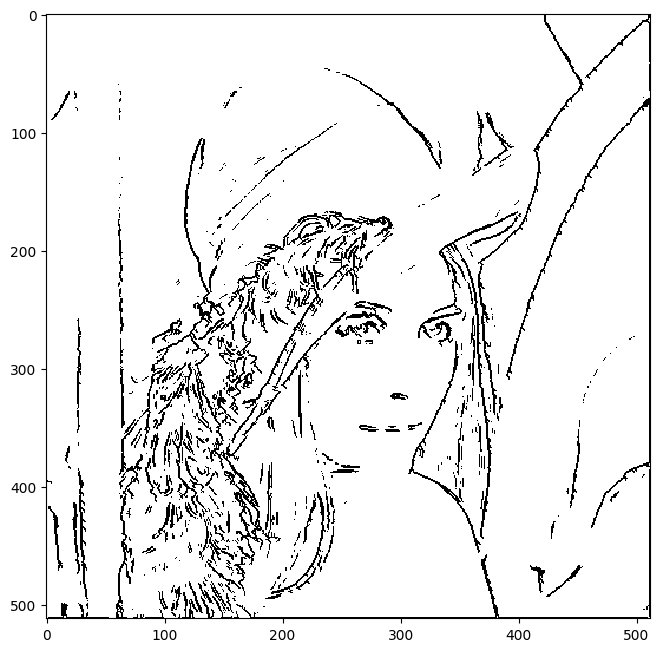

In [12]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(result, interpolation='nearest')
plt.show()